In [1]:
import grabbers
import networkx as nx
import asyncio
import matplotlib.pyplot as plt
import os

In [2]:
async def gather_with_concurrency(n, *coros):
    semaphore = asyncio.Semaphore(n)

    async def sem_coro(coro):
        async with semaphore:
            return await coro
    return await asyncio.gather(*(sem_coro(c) for c in coros))

In [ ]:
players_searched = []
async def search_for_players(depth, root_user: grabbers.AdjacentPlayer | grabbers.RootPlayer):
    # if depth == 0:
    #     return
    # for other_player in root_user.players_raided_with:
    #     if not root_user.players_raided_with[other_player][0] in players_searched:
    #         print(root_user.players_raided_with[other_player][0])
    #         adjacent_player = grabbers.AdjacentPlayer(root_user.players_raided_with[other_player][0], other_player, root_user.players_raided_with[other_player][2])
    #         await adjacent_player.setup()
    #         players_searched.append(root_user.players_raided_with[other_player][0])
    #         await search_for_players(depth - 1, root_user=adjacent_player)
    # add first user to queue with passed in depth
    queue = [(depth, root_user)]
    # tasks used for asyncio
    tasks = []
    # checks every connected player to user: if user is already searched, skip
    # otherwise, create an object of the connected user, append their setup as a task and append the user as the next user to have its' users searched
    # this will hopefully not timeout unlike the recursive version
    # will stop whenever it searches through all users to a depth of depth
    while queue:
        curr_depth, player_in_question = queue.pop(0)
        if curr_depth == 0:
            continue
        for connected_player in player_in_question.players_raided_with:
            if player_in_question.players_raided_with[connected_player][0] not in players_searched:
                adjacent_player = grabbers.AdjacentPlayer(
                    player_in_question.players_raided_with[connected_player][0],
                    connected_player,
                    player_in_question.players_raided_with[connected_player][2]
                )
            # make sure we aren't searching the same users
            players_searched.append(player_in_question.players_raided_with[connected_player][0])
            # make asynchronous task
            task = asyncio.create_task(adjacent_player.setup())
            tasks.append(task)
            queue.append((curr_depth-1,adjacent_player))
        
        await gather_with_concurrency(1, *tasks)


In [ ]:
async def main():
    # ask for username then create an object of the player
    name = input("Enter the username of the player you want to add. Example: Khazicus#9648: ")
    player = grabbers.RootPlayer(name)
    await player.setup()

    print(player.players_raided_with)
    g = nx.Graph()
    for connection in player.players_raided_with:
        g.add_edge(player.bungie_name, player.players_raided_with[connection][0], weight=player.players_raided_with[connection][1])
    nx.draw(g,with_labels=True)

    print("Nodes:", g.nodes())
    print("Edges:", g.edges())

    plt.show()

    await search_for_players(5, player)
    # # for other_player in player.players_raided_with:
    # #     try:
    # #         print(player.players_raided_with[other_player][0])
    # #         player_obj = grabbers.AdjacentPlayer(player.players_raided_with[other_player][0], other_player, player.players_raided_with[other_player][2])
    # #         await player_obj.setup()
    # #         # new_sort = dict(sorted(player_obj.players_raided_with.items(), key=lambda x: x[1][1], reverse=True))
    # #         # full_user_dict[player_obj.bungie_name] = new_sort
    # #         for connection in player_obj.players_raided_with:
    # #             g.add_edge(player_obj.bungie_name, player_obj.players_raided_with[connection][0], weight=player_obj.players_raided_with[connection][1])
            
    #         print("Nodes:", g.nodes())
    #         print("Edges:", g.edges())
            
    #     except:
    #         print(f"failed to get data for {player.players_raided_with[other_player][0]}")

    # nx.draw(g,with_labels=True)
    # plt.show()

: 

khazicus 9648
{'4611686018453633365': ['zealand12b#3184', 36, 2], '4611686018517092168': ['Hypwr#8749', 122, 3], '4611686018516904660': ['Lunar#0270', 107, 3], '4611686018442826738': ['SoulReturn#6095', 68, 2], '4611686018460908005': ['big guy.#1314', 8, 2], '4611686018431607955': ['Farva#3282', 7, 1], '4611686018436479266': ['Brightest_Day#9082', 2, 1], '4611686018483723424': ['burr#0105', 77, 3], '4611686018456291382': ['Uncle Iroh#9531', 2, 2], '4611686018476686275': ['Boony ♡#0966', 15, 1], '4611686018527638905': ['namenroodles#9539', 43, 3], '4611686018428884323': ['ryan#9443', 77, 2], '4611686018463706282': ['Rose, A Court Of Thorns#7196', 1, 1], '4611686018476253541': ['Stealth, The Rizzlation ッ#2233', 1, 1], '4611686018511354759': ['SteadySweaty#8865', 1, 3], '4611686018467487748': ['Sparrowwwwwwwww#7900', 52, 3], '4611686018491602250': ['Nacrova#4142', 3, 3], '4611686018473998478': ['Maverick#6872', 1, 1], '4611686018467783384': ['Kirati#8535', 1, 3], '4611686018472819428': ['

c:\Users\mcsta\miniconda3\envs\DestinySummarizer2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12483 (\N{KATAKANA LETTER SMALL TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mcsta\miniconda3\envs\DestinySummarizer2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32654 (\N{CJK UNIFIED IDEOGRAPH-7F8E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mcsta\miniconda3\envs\DestinySummarizer2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22269 (\N{CJK UNIFIED IDEOGRAPH-56FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mcsta\miniconda3\envs\DestinySummarizer2\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20043 (\N{CJK UNIFIED IDEOGRAPH-4E4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mcsta\miniconda3\envs\DestinySummarizer2\Lib\site-package

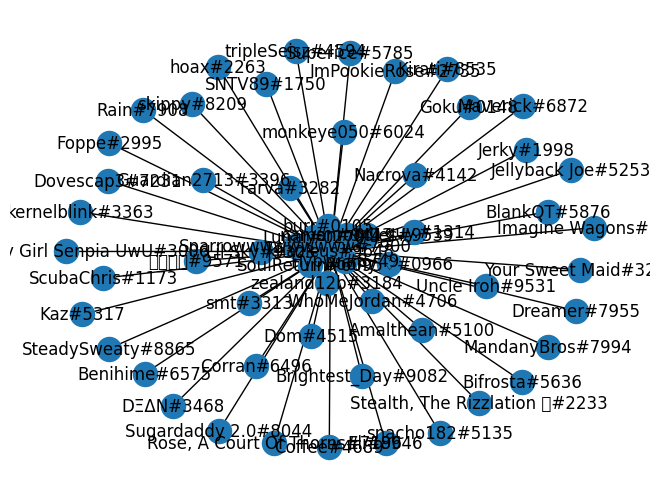

zealand12b#3184 4611686018453633365 2
Hypwr#8749 4611686018517092168 3
Lunar#0270 4611686018516904660 3
SoulReturn#6095 4611686018442826738 2
big guy.#1314 4611686018460908005 2
Farva#3282 4611686018431607955 1
Brightest_Day#9082 4611686018436479266 1
burr#0105 4611686018483723424 3
Uncle Iroh#9531 4611686018456291382 2
Boony ♡#0966 4611686018476686275 1
namenroodles#9539 4611686018527638905 3
ryan#9443 4611686018428884323 2
Rose, A Court Of Thorns#7196 4611686018463706282 1
Stealth, The Rizzlation ッ#2233 4611686018476253541 1
SteadySweaty#8865 4611686018511354759 3
Sparrowwwwwwwww#7900 4611686018467487748 3
Nacrova#4142 4611686018491602250 3
Maverick#6872 4611686018473998478 1
Kirati#8535 4611686018467783384 3
Corran#6496 4611686018472819428 3
Guardian2713#3396 4611686018489247597 3
Foppe#2995 4611686018490924109 3
Amalthean#5100 4611686018452087231 2
WhoMeJordan#4706 4611686018436362516 2
SNTV89#1750 4611686018502814830 2
Benihime#6575 4611686018455087649 2
ImPookieRose#2735 46116860

ValueError: too many file descriptors in select()

: 

: 

In [5]:
await main()
grabbers.CONNECT.close()

In [ ]:
g = nx.Graph()
g = grabbers.add_edge_to_graph(g)
pos = nx.spring_layout(g)
nx.draw(g,pos=pos,with_labels=True)
plt.show()

KeyboardInterrupt: 